<IPython.core.display.Javascript object>


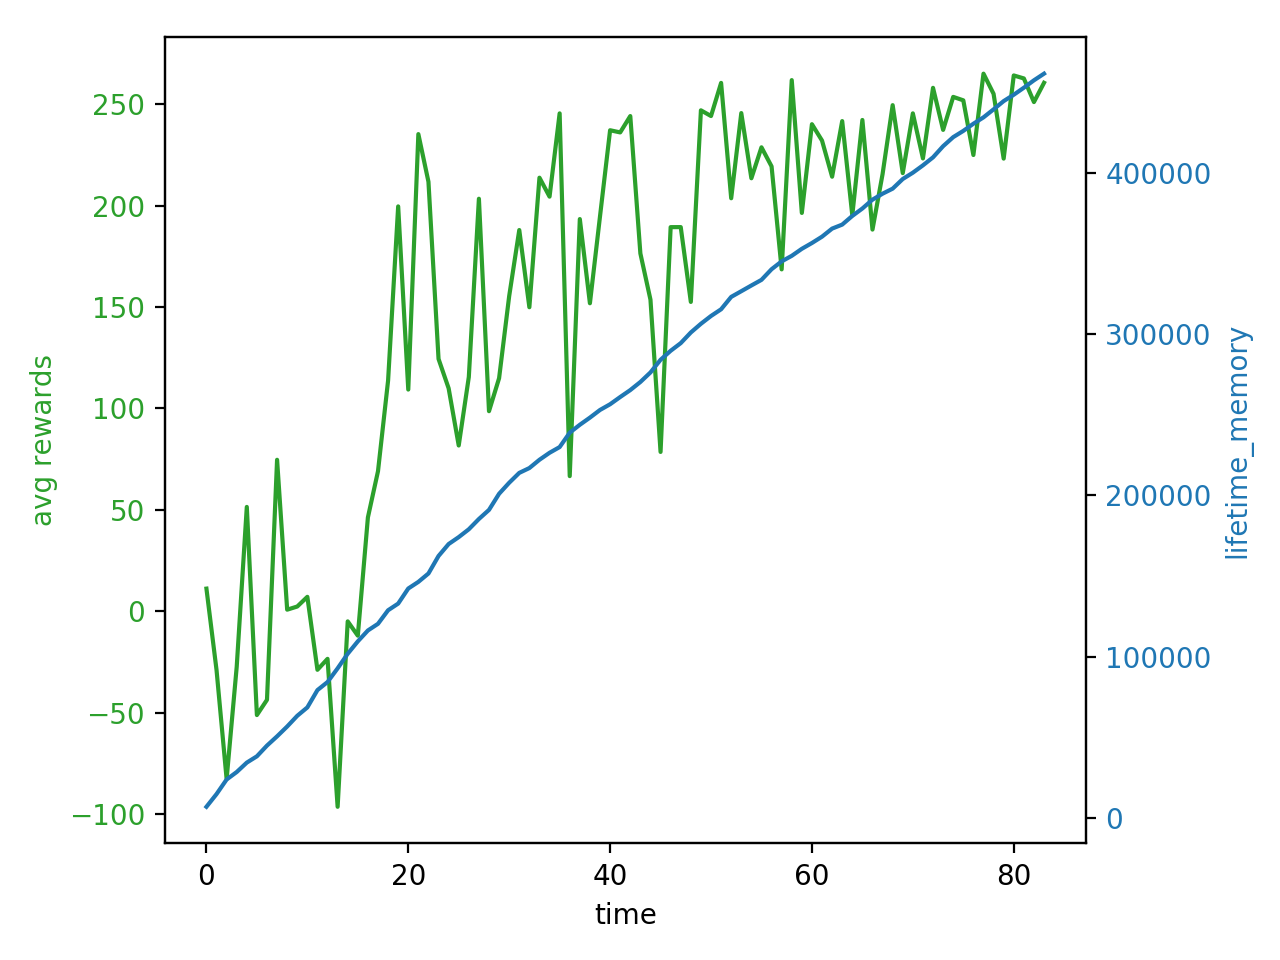

In [8]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import matplotlib.pyplot as plt
import pickle, os

file_name = 'results_1571531926.868758.txt'
results_path = os.path.join(os.getcwd(), 'actor_critic_td3/results', file_name)

results = []
with open(results_path, "rb") as fp:
    while 1:
        try:
            results.append(pickle.load(fp))
        except EOFError:
            break

mins = [t[0] for t in results]
avg = [t[1] for t in results]
maxs = [t[2] for t in results]
lifetime_memory = [t[3] for t in results]
    
%matplotlib notebook
#plt.plot(avg)
#plt.plot(lifetime_memory)
#plt.xlabel("Episode")
#plt.ylabel("Reward")

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('time')
ax1.set_ylabel('avg rewards', color=color)
ax1.plot(avg, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('lifetime_memory', color=color)
ax2.plot(lifetime_memory, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

plt.show()
